In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("/content/drive/MyDrive/0_x.csv",
                header=None)
y = pd.read_csv("/content/drive/MyDrive/0_y.csv",
                header=None)

In [3]:
from sklearn.linear_model import LinearRegression

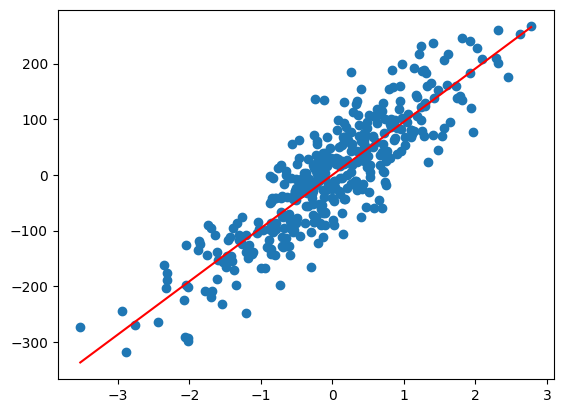

In [4]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_
binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

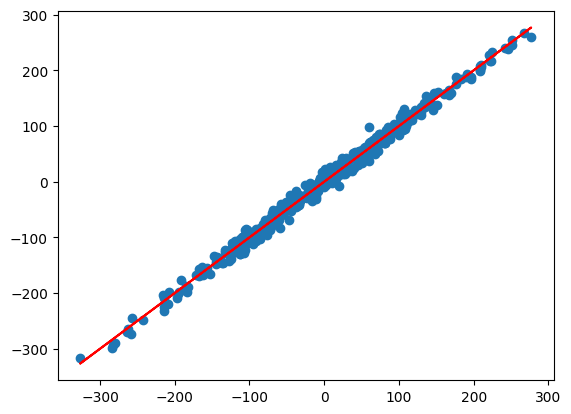

In [5]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

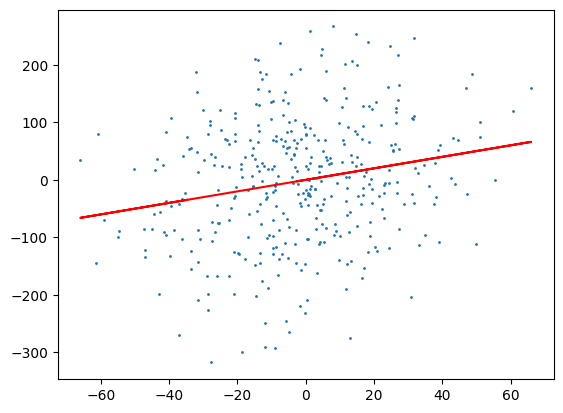

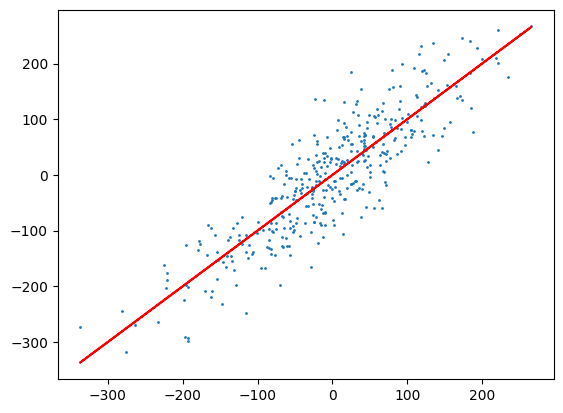

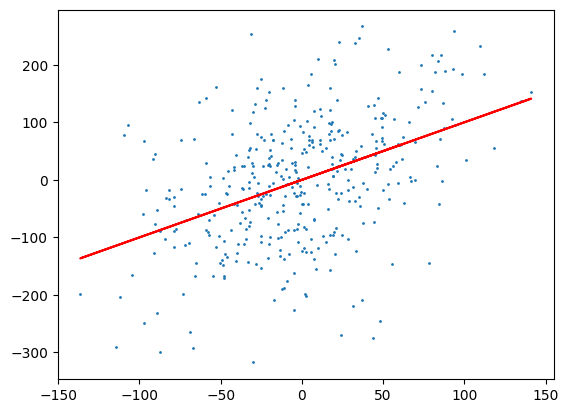

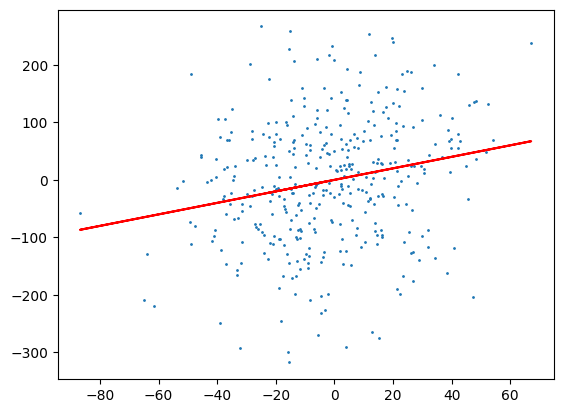

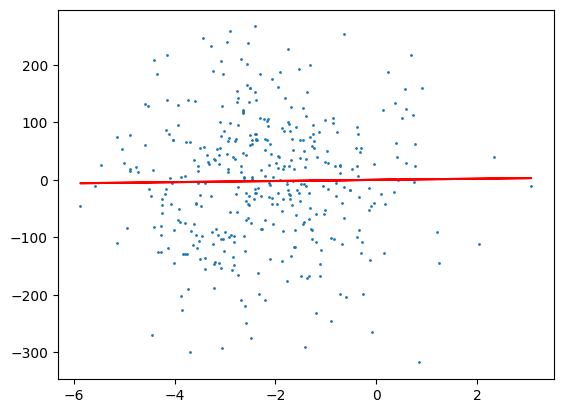

In [32]:
from sklearn.metrics import r2_score

dic = {"Var" : [], "Power" : [], "r2_score" : []}
dic1 = {"Var" : [], "Power" : [], "r2_score" : []}
def app(var, power, r2=100):
    dic["Var"].append(f"x{var + 1}")
    dic["Power"].append(power)
    dic["r2_score"].append(r2)

for i in range(5):
    binary = LinearRegression()
    binary.fit(x[[i]], y)
    yy = binary.predict(x[[i]])
    app(i, 1, r2_score(y, yy))
    plt.scatter(yy, y, s=1)
    plt.plot(yy, yy, c='r')
    plt.show()

error after gradient descent: 10


ValueError: ignored

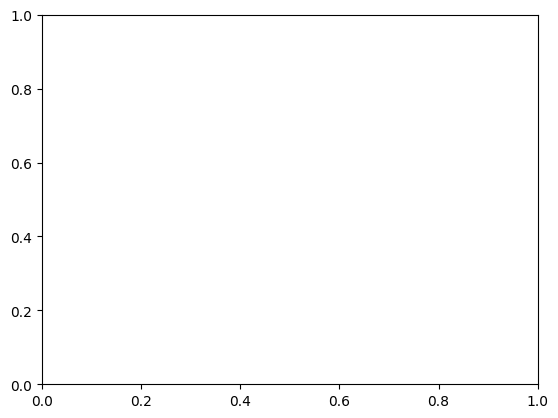

In [8]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.01) #Изменение значения alpha
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [28]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

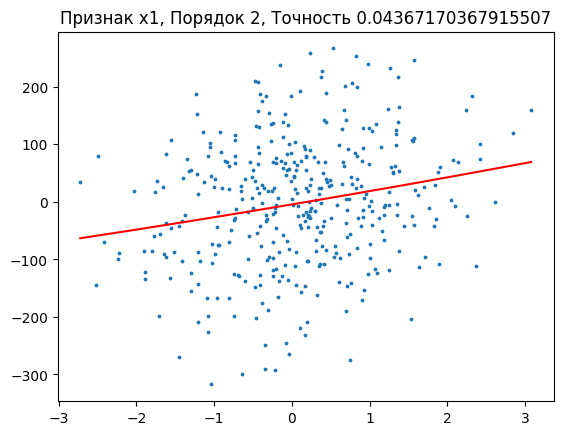

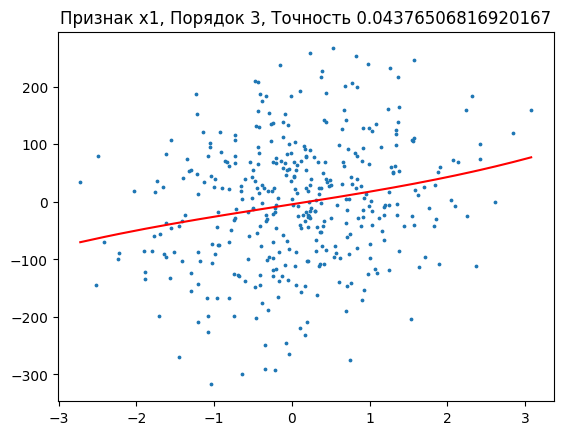

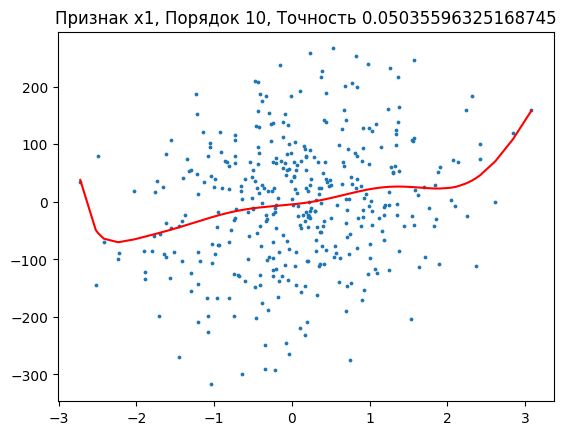

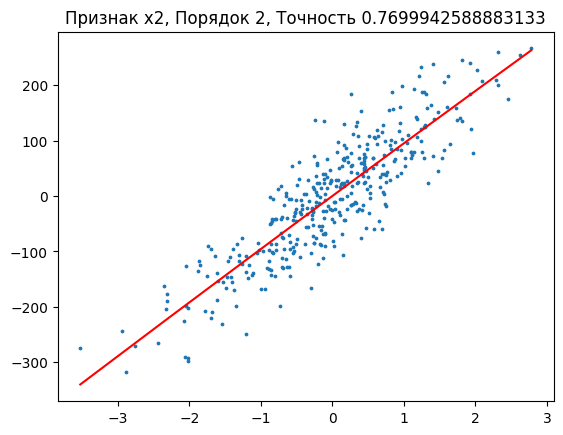

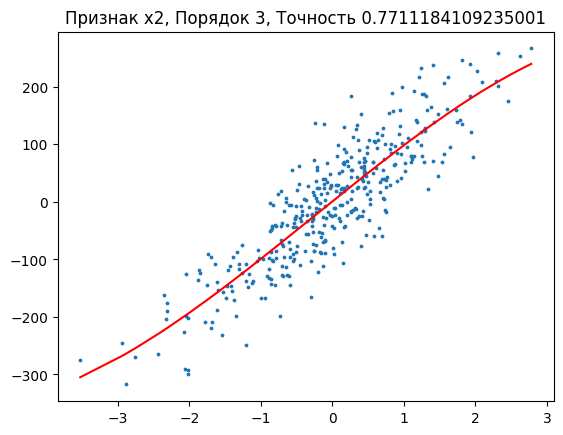

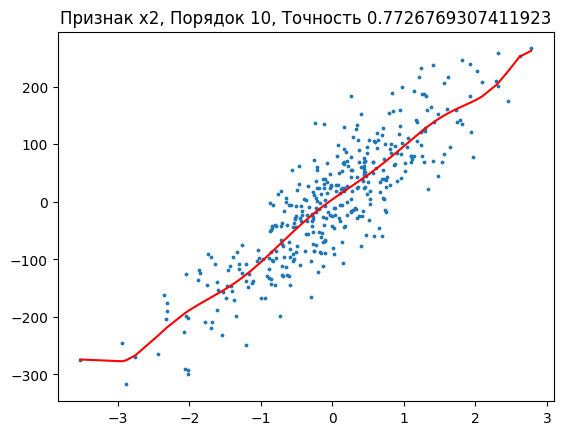

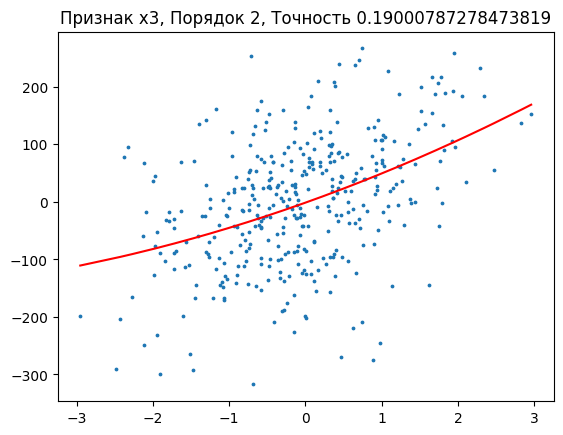

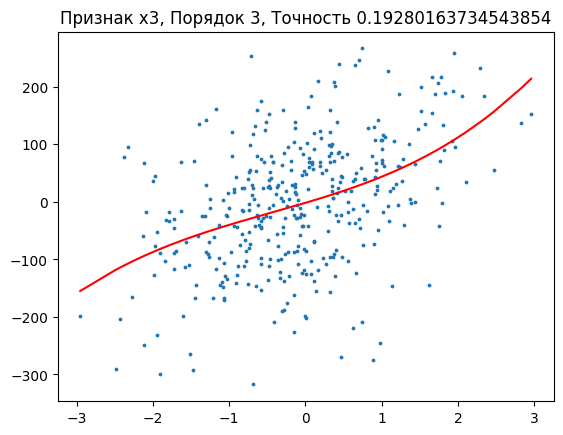

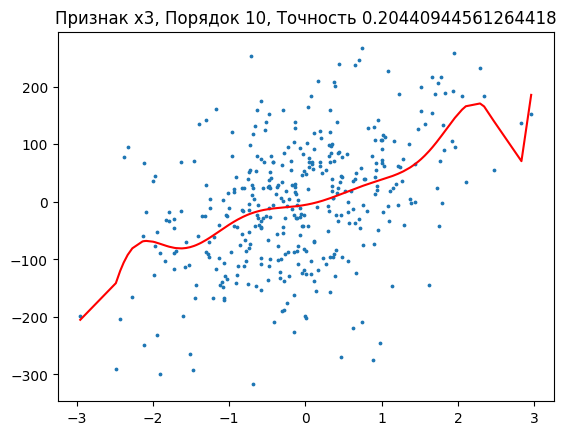

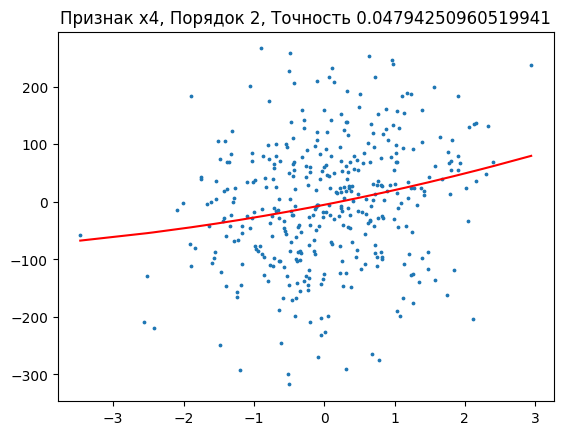

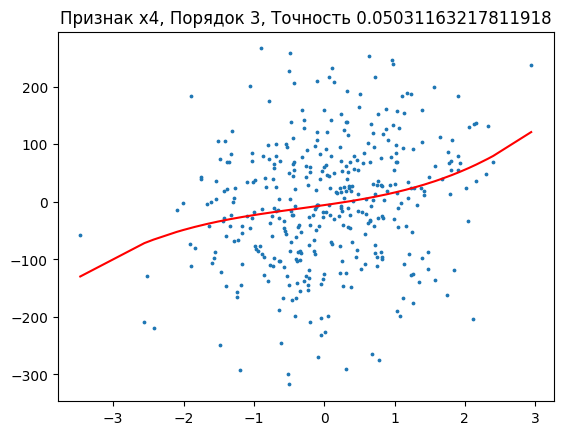

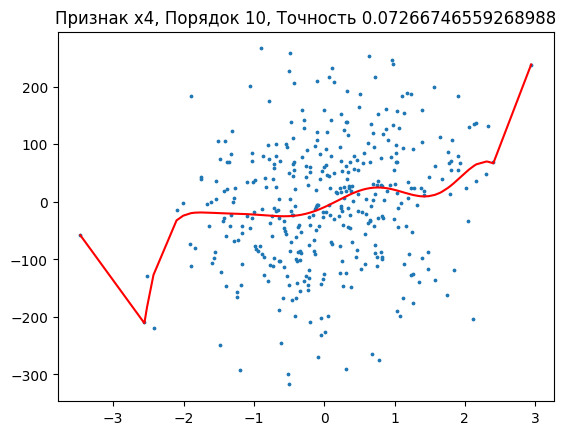

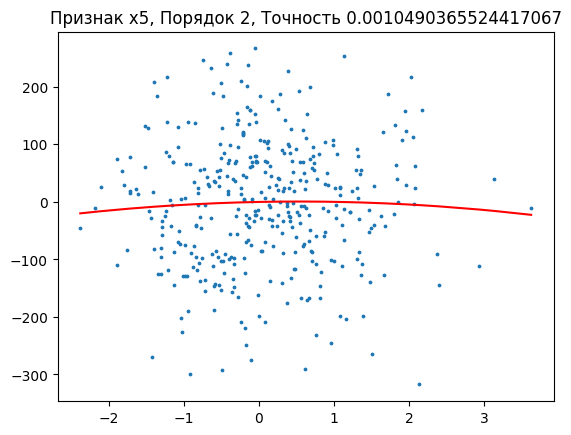

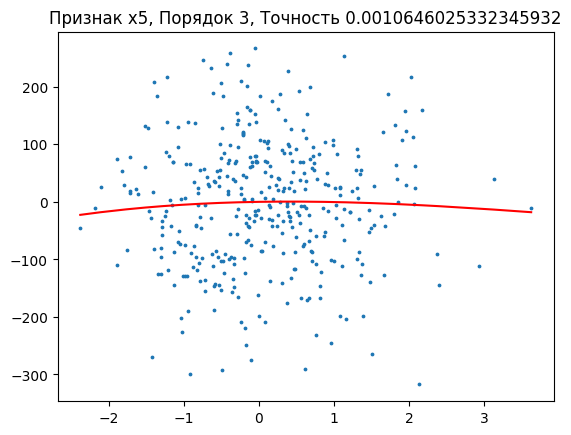

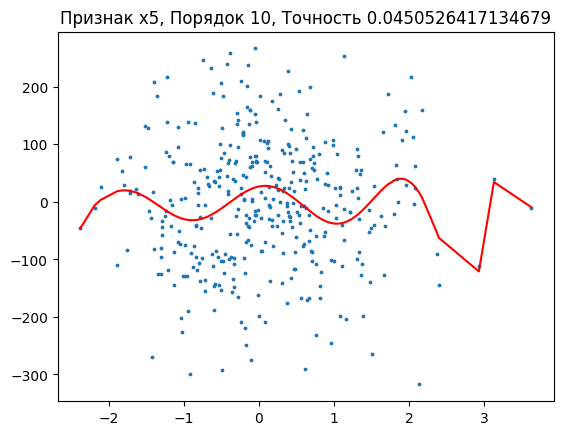

In [38]:
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        xp = poly_features.fit_transform(x[[i]].values.reshape(-1, 1))
        binary = LinearRegression()
        binary.fit(xp, y)
        yy = binary.predict(xp)

        original_x =  x.iloc[:, i]
        sorted_zip = sorted(zip(original_x, yy), key=lambda pair: pair[0])
        x_, yy_ = zip(*sorted_zip)
        plt.scatter(original_x, y, s=3)
        plt.plot(x_, yy_, color='r')
        plt.title(f"Признак x{i+1}, Порядок {degree}, Точность {r2_score(y, yy)}")
        plt.show()

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [33]:
df = pd.DataFrame(dic)
df

,Var,Power,r2_score
0,x1,1,0.043643
1,x2,1,0.769974
2,x3,1,0.187945
3,x4,1,0.047470
4,x5,1,0.000172


6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

3.62 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.16 ms ± 87 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.26 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.08 ms ± 86.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.11 ms ± 81.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.18 ms ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.09 ms ± 78.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.16 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.29 ms ± 388 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.18 ms ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.15 ms ± 65.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.19 ms ± 90.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.08 ms ± 47.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.23 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each

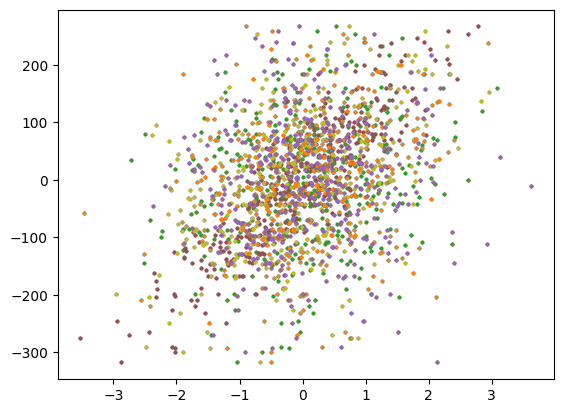

In [34]:
time = []
for i in range(x.shape[1]):
    for degree in [2, 3, 10]:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        xp = poly_features.fit_transform(x[[i]].values.reshape(-1, 1))
        binary = LinearRegression()
        a = %timeit -o binary.fit(xp, y)
        time.append(a)
        yy = binary.predict(xp)

        original_x =  x.iloc[:, i]
        sorted_zip = sorted(zip(original_x, yy), key=lambda pair: pair[0])
        x_, yy_ = zip(*sorted_zip)
        plt.scatter(original_x, y, s=3)


0